In [ ]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.5
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [ ]:
IMAGE_SIZE = [224, 224]

train_path = '/content/drive/MyDrive/Msc/Semester 03/ML/Assignment 2/Final dataset/train'
valid_path = '/content/drive/MyDrive/Msc/Semester 03/ML/Assignment 2/Final dataset/test'

In [ ]:
VGG16 = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [ ]:
for layer in VGG16.layers:
    layer.trainable = False

In [ ]:
folders = glob('/content/drive/MyDrive/Msc/Semester 03/ML/Assignment 2/Final dataset/train/*')

In [ ]:
folders

['/content/drive/MyDrive/Group 13 -  Final Year Project 2021 - FOT/dataset/Final dataset/train/hedella',
 '/content/drive/MyDrive/Group 13 -  Final Year Project 2021 - FOT/dataset/Final dataset/train/gojari',
 '/content/drive/MyDrive/Group 13 -  Final Year Project 2021 - FOT/dataset/Final dataset/train/jabara',
 '/content/drive/MyDrive/Group 13 -  Final Year Project 2021 - FOT/dataset/Final dataset/train/pethipala',
 '/content/drive/MyDrive/Group 13 -  Final Year Project 2021 - FOT/dataset/Final dataset/train/wel gahala',
 '/content/drive/MyDrive/Group 13 -  Final Year Project 2021 - FOT/dataset/Final dataset/train/girapala']

In [ ]:
x = Flatten()(VGG16.output)

In [ ]:
prediction = Dense(len(folders), activation='softmax')(x)

model = Model(inputs=VGG16.input, outputs=prediction)

In [ ]:
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

In [ ]:
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [ ]:
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/Msc/Semester 03/ML/Assignment 2/Final dataset/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 952 images belonging to 6 classes.


In [ ]:
test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/Msc/Semester 03/ML/Assignment 2/Final dataset/test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 147 images belonging to 6 classes.


In [ ]:
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=15,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


Epoch 1/15
30/30 [==============================] - 38s 1s/step - loss: 0.8279 - accuracy: 0.7353 - val_loss: 0.2132 - val_accuracy: 0.9252
Epoch 2/15
30/30 [==============================] - 14s 448ms/step - loss: 0.1184 - accuracy: 0.9548 - val_loss: 0.0921 - val_accuracy: 0.9728
Epoch 3/15
30/30 [==============================] - 14s 451ms/step - loss: 0.0525 - accuracy: 0.9874 - val_loss: 0.0589 - val_accuracy: 0.9796
Epoch 4/15
30/30 [==============================] - 13s 443ms/step - loss: 0.0374 - accuracy: 0.9937 - val_loss: 0.0925 - val_accuracy: 0.9728
Epoch 5/15
30/30 [==============================] - 13s 446ms/step - loss: 0.0259 - accuracy: 0.9947 - val_loss: 0.0456 - val_accuracy: 0.9796
Epoch 6/15
30/30 [==============================] - 13s 450ms/step - loss: 0.0185 - accuracy: 0.9989 - val_loss: 0.0654 - val_accuracy: 0.9660
Epoch 7/15
30/30 [==============================] - 13s 445ms/step - loss: 0.0141 - accuracy: 1.0000 - val_loss: 0.0805 - val_accuracy: 0.9728
Ep

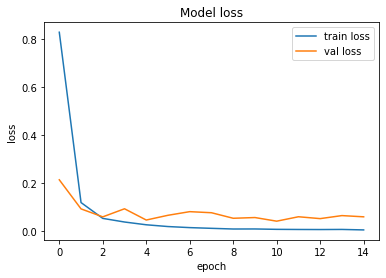

<Figure size 432x288 with 0 Axes>

In [ ]:
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.title("Model loss")
plt.legend()
plt.ylabel("loss")
plt.xlabel("epoch")
plt.show()
plt.savefig('/content/drive/MyDrive/content/drive/MyDrive/Msc/Semester 03/ML/Assignment 2/VGG16/LossVal_loss')

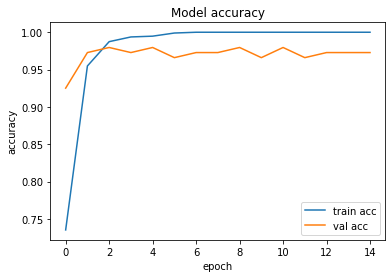

<Figure size 432x288 with 0 Axes>

In [ ]:
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.title("Model accuracy")
plt.legend()
plt.ylabel("accuracy")
plt.xlabel("epoch")
plt.show()
plt.savefig('/content/drive/MyDrive/content/drive/MyDrive/Msc/Semester 03/ML/Assignment 2/VGG16/LossVal_loss')

In [ ]:
from tensorflow.keras.models import load_model

model.save('/content/drive/MyDrive/content/drive/MyDrive/Msc/Semester 03/ML/Assignment 2/VGG16/model_VGG16.h5')

In [ ]:
import tensorflow_datasets as tfds
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping
import pickle
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array

In [ ]:
img_path = '/content/drive/MyDrive/content/drive/MyDrive/Msc/Semester 03/ML/Assignment 2/Final dataset/test/gojari/20211118_153750.jpg'
image = load_img(img_path, target_size=(224, 224))

In [ ]:
image = img_to_array(image)
image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))

In [ ]:
categories = ['girapala','gojari', 'hedella', 'jabara','pethipala',"wel gahala"]

In [ ]:
predict_prob = model.predict(image)
print(categories[np.argmax(predict_prob)])

gojari
